# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [1]:
API_KEY = "a07f40e8746fd3a28071c3b60e10ba2e"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [2]:
import requests
import pandas as pd

API_KEY = "a07f40e8746fd3a28071c3b60e10ba2e"
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]

weather_data_list = []

for location in locations:
    city, country = location.split(',')
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()
    if geocode_response:
        latitude = geocode_response[0]['lat']
        longitude = geocode_response[0]['lon']
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']
        for entry in forecast_data:
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,
                "humidity": entry["main"]["humidity"],
                "description": entry["weather"][0]["description"]
            })

weather_data = pd.DataFrame(weather_data_list)
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

In [3]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-13 12:00:00,18.98,65,overcast clouds
1,Paris,FR,48.858890,2.320041,2024-05-13 15:00:00,19.69,61,overcast clouds
2,Paris,FR,48.858890,2.320041,2024-05-13 18:00:00,20.00,61,broken clouds
3,Paris,FR,48.858890,2.320041,2024-05-13 21:00:00,16.88,78,broken clouds
4,Paris,FR,48.858890,2.320041,2024-05-14 00:00:00,15.54,87,broken clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-17 21:00:00,7.31,65,broken clouds
116,Moscow,RU,55.750446,37.617494,2024-05-18 00:00:00,6.75,63,broken clouds
117,Moscow,RU,55.750446,37.617494,2024-05-18 03:00:00,6.62,57,overcast clouds
118,Moscow,RU,55.750446,37.617494,2024-05-18 06:00:00,7.30,52,overcast clouds


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [5]:
import plotly.express as px

fig = px.scatter_mapbox(weather_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        size="humidity",
                        hover_name="city",
                        hover_data=["description"],
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},
                        zoom=3,
                        mapbox_style="carto-positron",
                        title="Weather Forecast")

fig.show()

In [6]:
import requests
import pandas as pd
import plotly.express as px


API_KEY = "a07f40e8746fd3a28071c3b60e10ba2e"

locations = [
    {"city": "New York", "country": "US"},
]

weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,
    })

df = pd.DataFrame(weather_data)

fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)
fig.show()

# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [7]:
import requests
import pandas as pd

API_KEY = "a07f40e8746fd3a28071c3b60e10ba2e"
locations = [
    {"city": "New York", "country": "US"},
    {"city": "Paris", "country": "FR"},
    {"city": "Berlin", "country": "DE"},
    {"city": "Moscow", "country": "RU"},
]

weather_data_list = []
for loc in locations:
    city = loc['city']
    country = loc['country']
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()
    if geocode_response:
        latitude = geocode_response[0]['lat']
        longitude = geocode_response[0]['lon']
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']
        for entry in forecast_data:
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,
                "feels_like": entry["main"]["feels_like"] - 273.15,
                "temp_min": entry["main"]["temp_min"] - 273.15,
                "temp_max": entry["main"]["temp_max"] - 273.15,
                "pressure": entry["main"]["pressure"],
                "humidity": entry["main"]["humidity"],
                "description": entry["weather"][0]["description"]
            })
df = pd.DataFrame(weather_data_list)
df_copy = df.copy()
df_copy

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,pressure,humidity,description
0,New York,US,40.712728,-74.006015,2024-05-13 12:00:00,10.08,9.34,10.08,11.52,1018,84,overcast clouds
1,New York,US,40.712728,-74.006015,2024-05-13 15:00:00,12.24,11.48,12.24,16.56,1018,75,broken clouds
2,New York,US,40.712728,-74.006015,2024-05-13 18:00:00,16.34,15.62,16.34,19.47,1017,61,broken clouds
3,New York,US,40.712728,-74.006015,2024-05-13 21:00:00,18.13,17.49,18.13,18.13,1016,57,scattered clouds
4,New York,US,40.712728,-74.006015,2024-05-14 00:00:00,16.91,16.35,16.91,16.91,1016,65,scattered clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Moscow,RU,55.750446,37.617494,2024-05-17 21:00:00,7.31,4.50,7.31,7.31,1020,65,broken clouds
156,Moscow,RU,55.750446,37.617494,2024-05-18 00:00:00,6.75,3.85,6.75,6.75,1021,63,broken clouds
157,Moscow,RU,55.750446,37.617494,2024-05-18 03:00:00,6.62,3.74,6.62,6.62,1022,57,overcast clouds
158,Moscow,RU,55.750446,37.617494,2024-05-18 06:00:00,7.30,4.28,7.30,7.30,1023,52,overcast clouds


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [8]:
grouped = df.groupby(['city', 'country'])
means = grouped['temperature'].mean()
stds = grouped['temperature'].std()
print('Среднее значение и стандартное отклонение температуры для каждого города:')
print(means)
print(stds)
mean_all = df['temperature'].mean()
std_all = df['temperature'].std()
print('\nСреднее значение и стандартное отклонение температуры для всех городов вместе:')
print('Среднее значение:', mean_all)
print('Стандартное отклонение:', std_all)

Среднее значение и стандартное отклонение температуры для каждого города:
city      country
Berlin    DE         17.87900
Moscow    RU         10.35200
New York  US         16.23300
Paris     FR         14.86475
Name: temperature, dtype: float64
city      country
Berlin    DE         3.912850
Moscow    RU         3.504705
New York  US         2.789427
Paris     FR         2.919665
Name: temperature, dtype: float64

Среднее значение и стандартное отклонение температуры для всех городов вместе:
Среднее значение: 14.832187500000021
Стандартное отклонение: 4.318155568271303


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

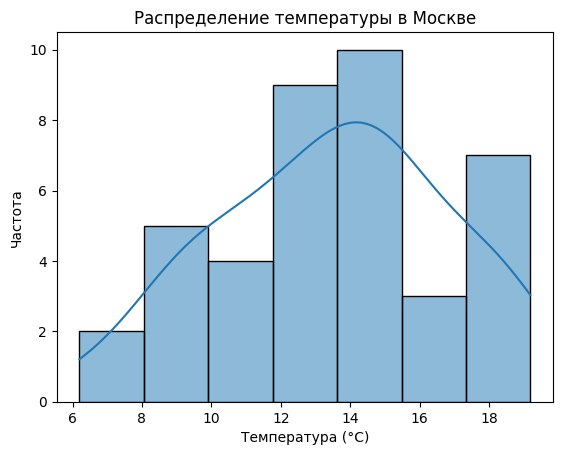

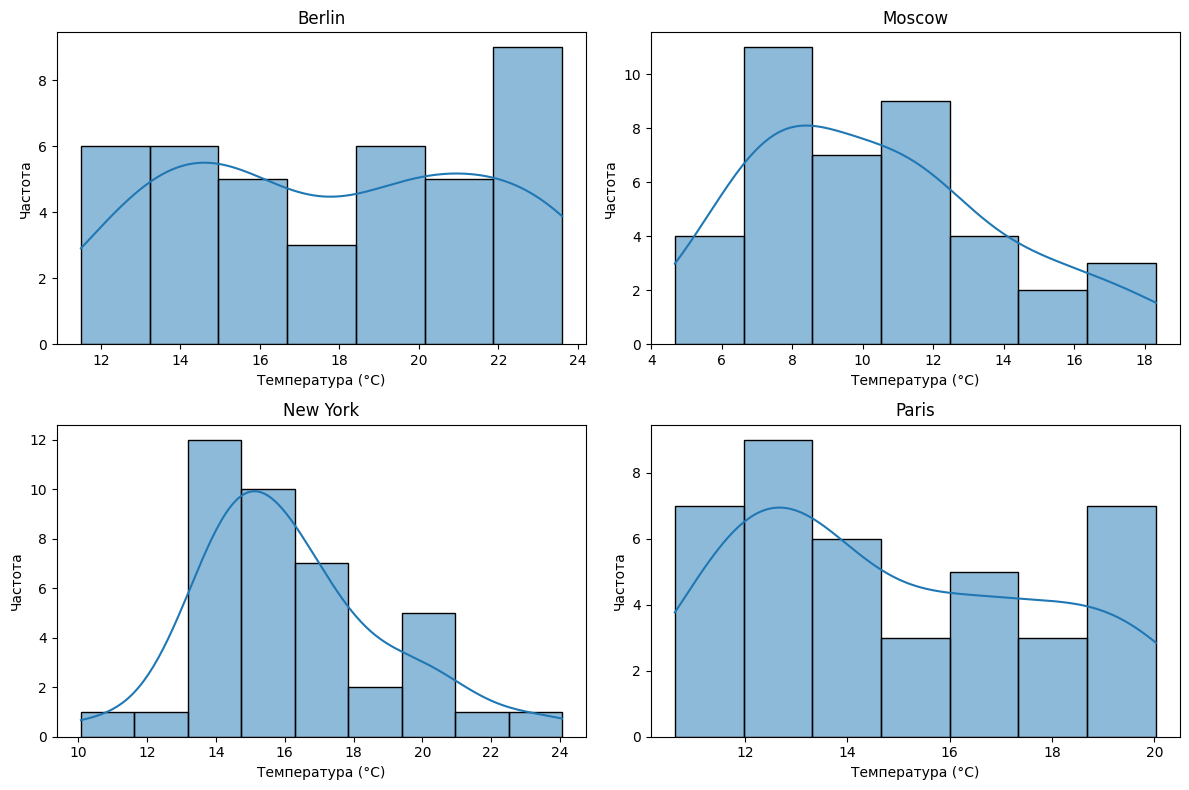

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['city'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, (city, data) in zip(axes.flatten(), grouped_data):
    sns.histplot(data['temperature'], ax=ax, kde=True, edgecolor='black')
    ax.set_title(city[0])
    ax.set_xlabel('Температура (°C)')
    ax.set_ylabel('Частота')
plt.tight_layout()
plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

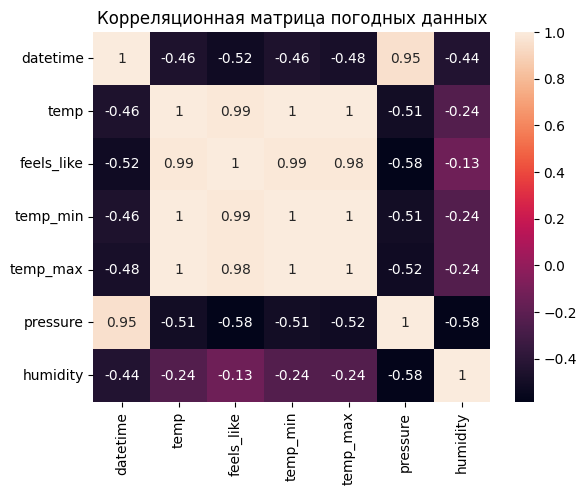

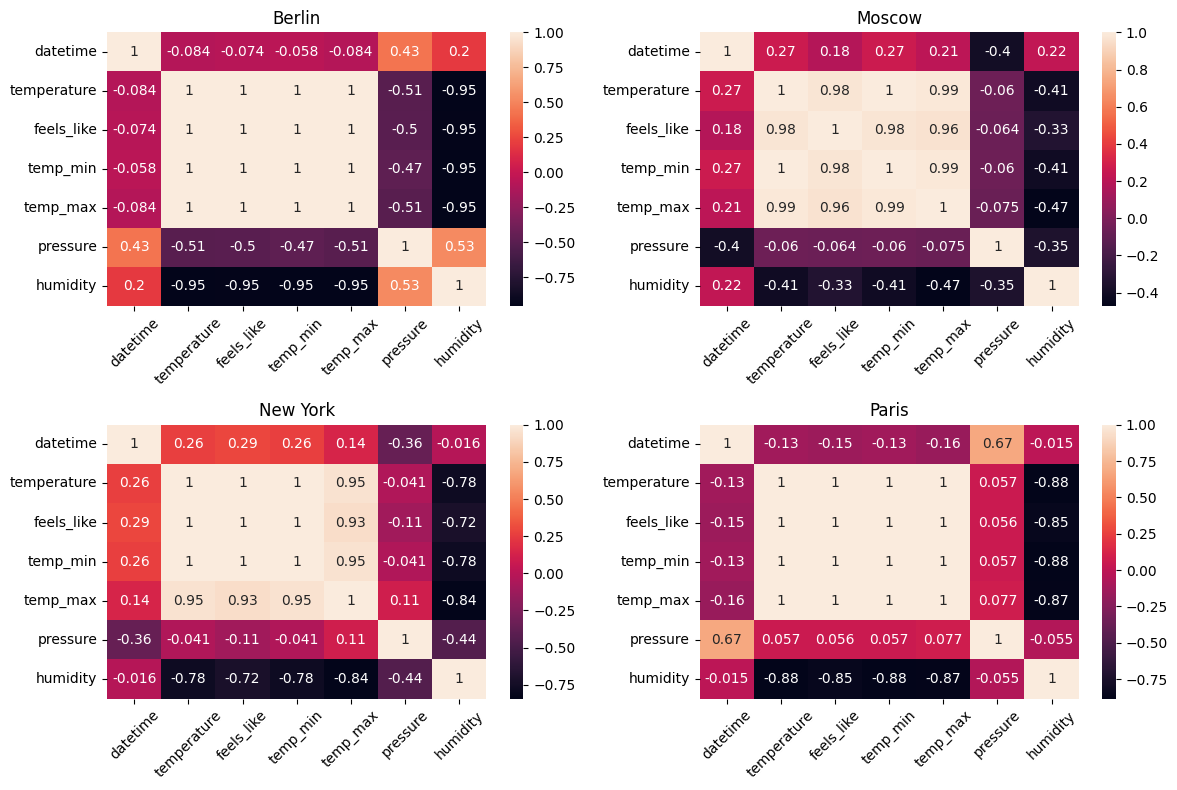

In [10]:
import seaborn as sns
import numpy as np

grouped_data = df.groupby('city')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

columns_of_interest = ['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']
for ax, (city, data) in zip(axes.flatten(), grouped_data):
    data['datetime'] = pd.to_datetime(data['datetime']).astype(np.int64) // 10**9
    numerical_data = data[columns_of_interest]
    corr_matrix = numerical_data.corr()
    sns.heatmap(corr_matrix, annot=True, ax=ax)
    ax.set_title(city)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

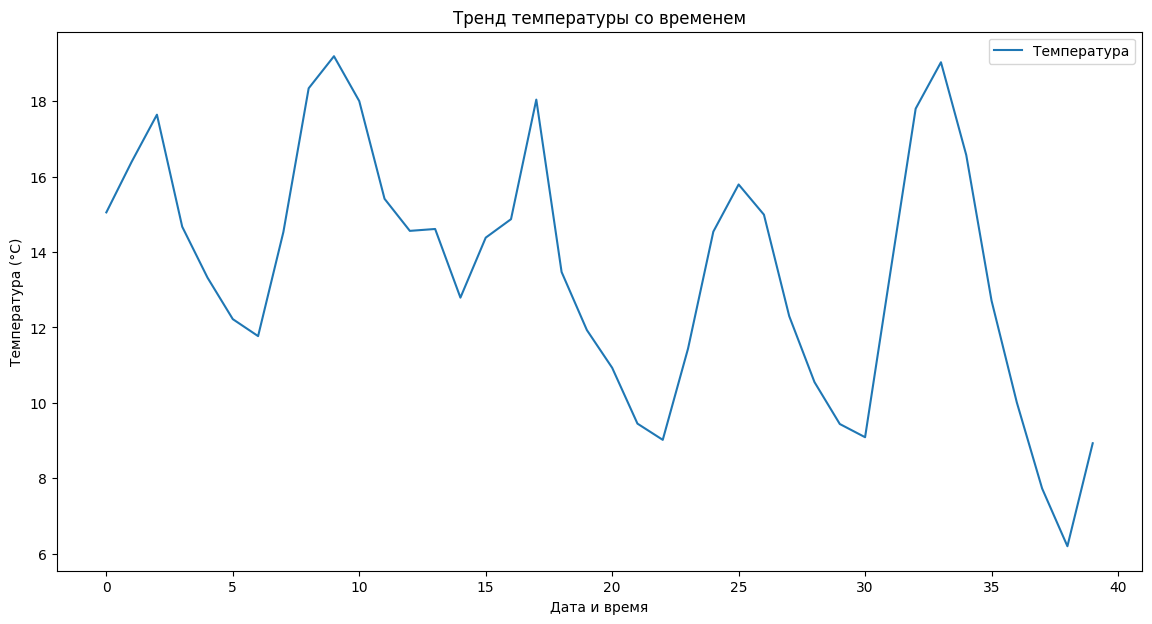

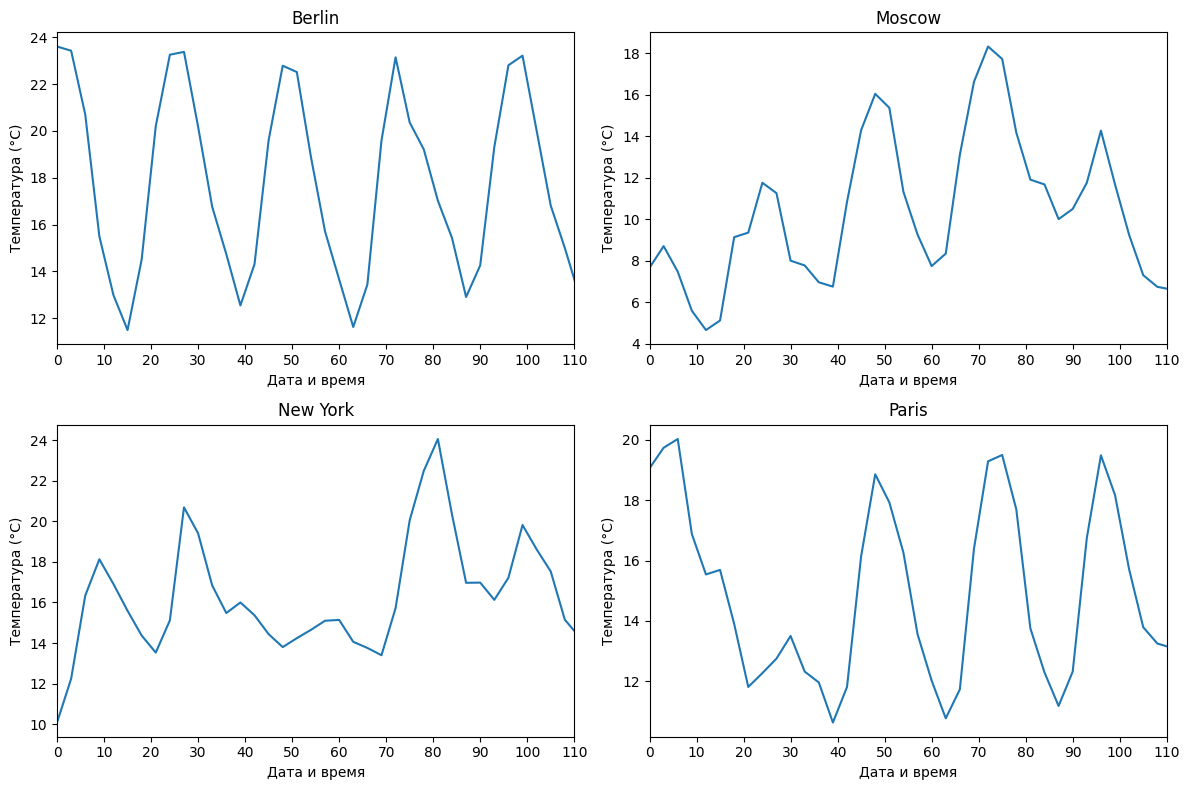

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, (city, data) in zip(axes.flatten(), grouped_data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['time_from_start'] = (data['datetime'] - data['datetime'].min()).dt.total_seconds() / (60 * 60)
    ax.plot(data['time_from_start'], data['temperature'])
    ax.set_title(city)
    ax.set_xlabel('Дата и время')
    ax.set_ylabel('Температура (°C)')
    ax.set_xlim(0, 40)
    ax.set_xticks(range(0, int(data['time_from_start'].max()) + 1, 10))
    ax.grid(False)
plt.tight_layout()
plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

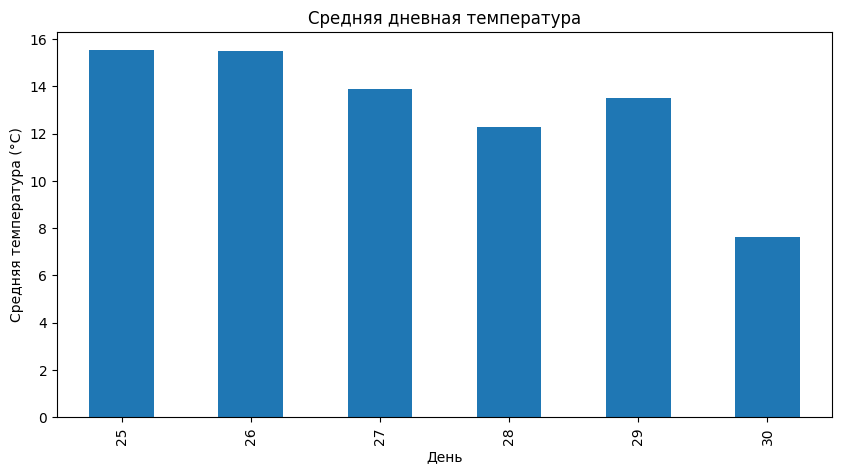

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

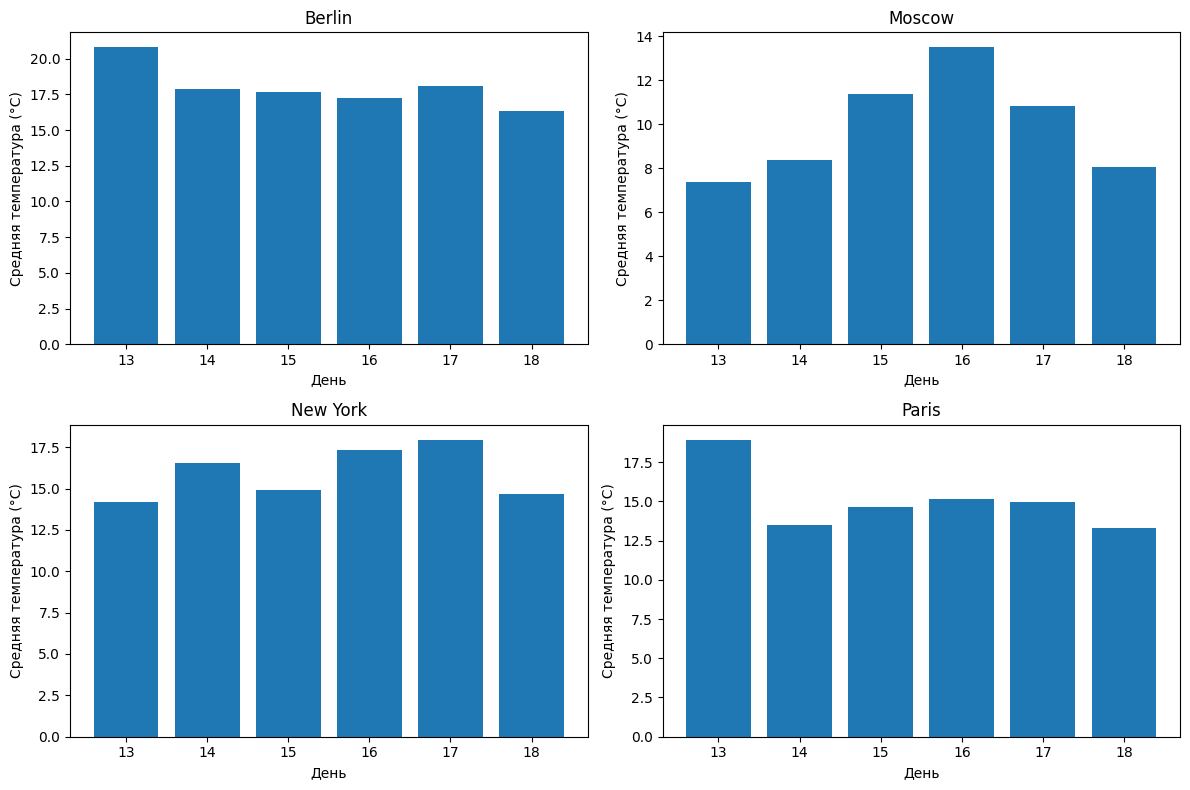

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, (city, data) in zip(axes.flatten(), grouped_data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    daily_avg_temp = data.groupby(data['datetime'].dt.date)['temperature'].mean()
    days = [date.day for date in daily_avg_temp.index]
    ax.bar(days, daily_avg_temp.values)
    ax.set_title(city)
    ax.set_xlabel('День')
    ax.set_ylabel('Средняя температура (°C)')
    ax.set_xticks(days)
    ax.grid(False)

plt.tight_layout()
plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

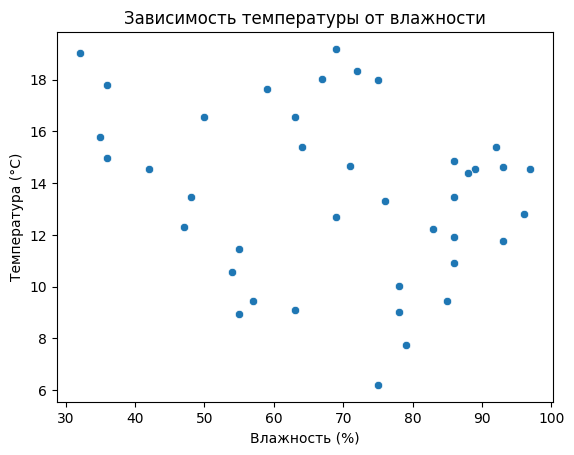

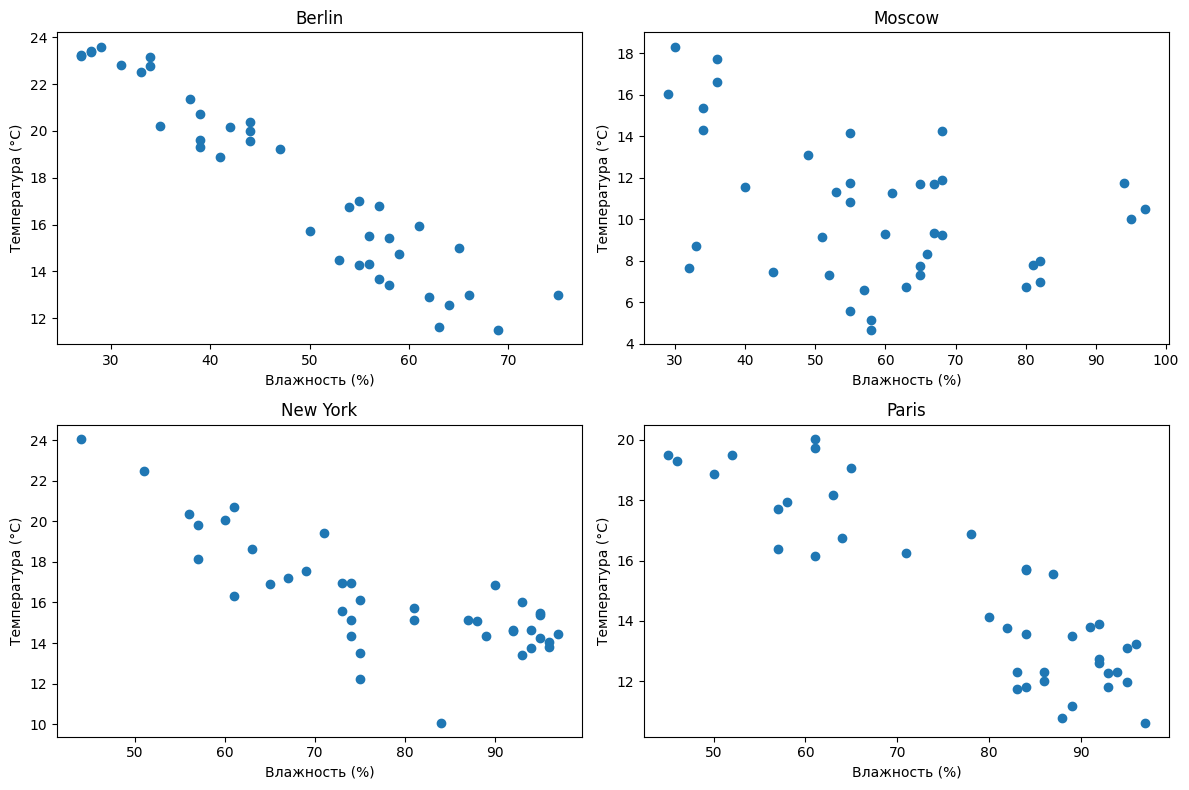

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, (city, data) in zip(axes.flatten(), grouped_data):
    ax.scatter(data['humidity'], data['temperature'])
    ax.set_title(city)
    ax.set_xlabel('Влажность (%)')
    ax.set_ylabel('Температура (°C)')

plt.tight_layout()
plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

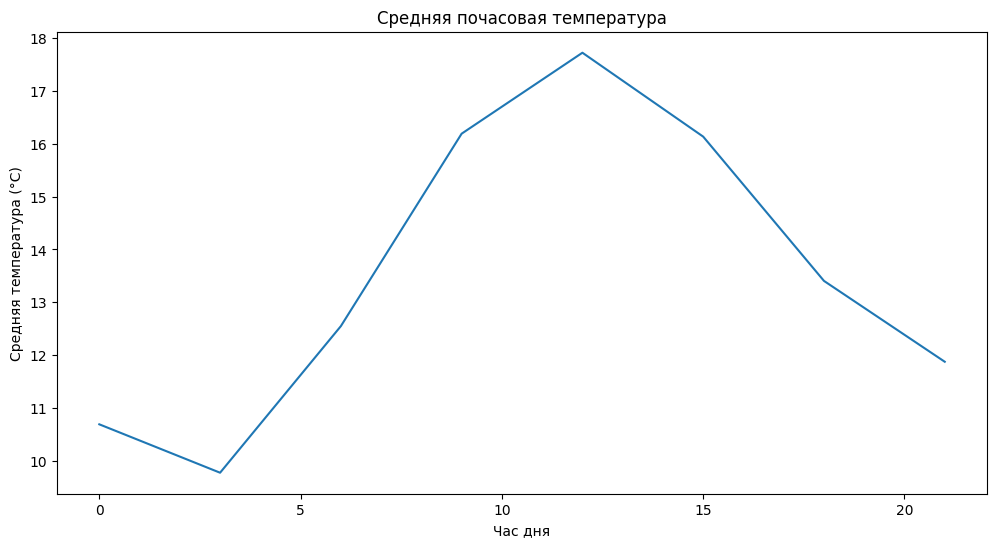

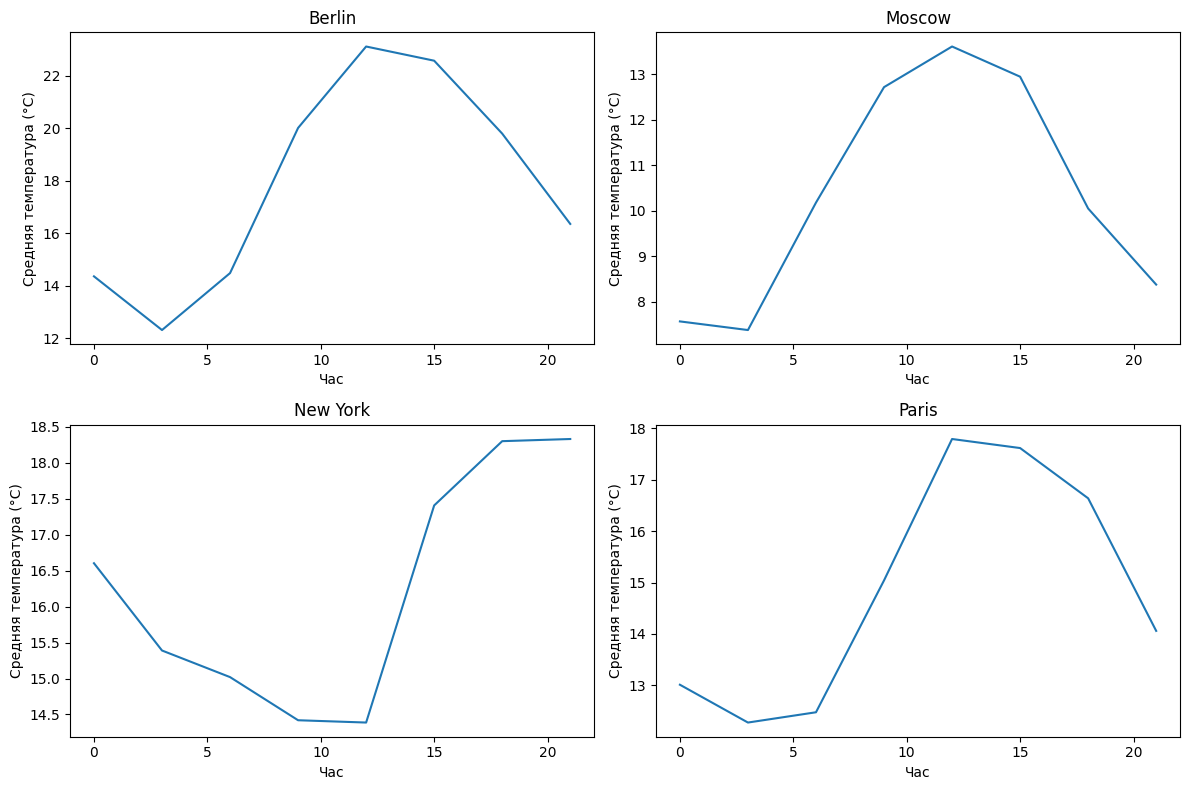

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, (city, data) in zip(axes.flatten(), grouped_data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    hourly_avg_temp = data.groupby(data['datetime'].dt.hour)['temperature'].mean()
    ax.plot(hourly_avg_temp.index, hourly_avg_temp.values)
    ax.set_title(city)
    ax.set_xlabel('Час')
    ax.set_ylabel('Средняя температура (°C)')

plt.tight_layout()
plt.show()

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [15]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.theta = np.array([])
        self.predicted_y = 0

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        XT = np.transpose(X)
        XTX = np.dot(XT, X)
        XTX_inv = np.linalg.pinv(XTX)
        XTy = np.dot(XT, y)
        self.theta = np.dot(XTX_inv, XTy)
        return self.theta

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.predicted_y = np.dot(X, self.theta)
        return self.predicted_y

    def score(self, y_true, y_pred):
        scores = []
        for true, pred in zip(y_true, y_pred):
            ssres = np.sum((true - pred)**2)
            sstol = np.sum((true - np.mean(true))**2)
            r2 = 1 - ssres/sstol
            scores.append(r2)
        return scores

### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [16]:
from datetime import timedelta

model = LinearRegression()

def get_coordinates(city):
    api_key = "a07f40e8746fd3a28071c3b60e10ba2e"
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
    response = requests.get(url)
    data = response.json()
    if 'coord' in data:
        latitude = data['coord']['lat']
        longitude = data['coord']['lon']
        return latitude, longitude
    else:
        return None, None
predicted_data = []
for city, data in df.groupby('city'):

    X_past = data[['temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].values
    y_future = data[['temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].shift(-1).values

    X_past = X_past[:-1]
    y_future = y_future[:-1]

    data['datetime'] = pd.to_datetime(data['datetime'])
    last_date = data['datetime'].iloc[-1].date()
    latitude, longitude = get_coordinates(city)
    predicted_values = []
    for i in range(X_past.shape[1]):
        X_feature = X_past[:, i].reshape(-1, 1)
        y_feature = y_future[:, i]
        model.fit(X_feature, y_feature)
        X_latest = X_feature[-1].reshape(1, -1)
        y_predicted_future = model.predict(X_latest)
        predicted_values.append(y_predicted_future[0])
    predicted_df = pd.DataFrame({
        'city': [city],
        'predicted_temperature': predicted_values[0],
        'predicted_feels_like': predicted_values[1],
        'predicted_temp_min': predicted_values[2],
        'predicted_temp_max': predicted_values[3],
        'predicted_pressure': predicted_values[4],
        'predicted_humidity': predicted_values[5],
        'latitude': latitude,
        'longitude': longitude,
        'datetime': [last_date]
    })

    predicted_data.append(predicted_df)
predicted_df_all = pd.concat(predicted_data, ignore_index=True)
predicted_df_all_copy = predicted_df_all.copy()
predicted_df_all_copy

,city,predicted_temperature,predicted_feels_like,predicted_temp_min,predicted_temp_max,predicted_pressure,predicted_humidity,latitude,longitude,datetime
0,Berlin,16.502984,15.691860,16.498420,16.502984,1016.189557,56.873547,52.5244,13.4105,2024-05-18
1,Moscow,8.044030,5.361066,8.042295,8.014796,1022.990083,53.874510,55.7522,37.6156,2024-05-18
2,New York,15.255054,15.140682,15.255054,15.328898,1011.855691,89.899050,40.7143,-74.0060,2024-05-18
3,Paris,13.105332,12.779744,13.105332,13.088144,1010.665219,88.860705,48.8534,2.3488,2024-05-18


In [17]:
from datetime import datetime, timedelta

actual_weather_data = []
for loc in locations:

    city = loc['city']
    country = loc['country']
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()
    latitude = geocode_response[0]['lat']
    longitude = geocode_response[0]['lon']
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city},{country}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    for item in data["list"]:
        dt_txt = pd.to_datetime(item["dt_txt"])
        if dt_txt.date() == (datetime.now() + timedelta(days=5)).date():
            actual_weather_data.append({
                "city": city,
                "country": country,
                "datetime": item['dt_txt'],
                "temperature": item["main"]["temp"] - 273.15,
                "feels_like": item["main"]["feels_like"] - 273.15,
                "temp_min": item["main"]["temp_min"] - 273.15,
                "temp_max": item["main"]["temp_max"] - 273.15,
                "pressure": item["main"]["pressure"],
                "humidity": item["main"]["humidity"],
                "latitude": latitude,
                'longitude': longitude,
                "description": item["weather"][0]["description"],
            })
            break

actual_df = pd.DataFrame(actual_weather_data)
actual_df

,city,country,datetime,temperature,feels_like,temp_min,temp_max,pressure,humidity,latitude,longitude,description
0,New York,US,2024-05-18 00:00:00,15.16,14.85,15.16,15.16,1013,81,40.712728,-74.006015,overcast clouds
1,Paris,FR,2024-05-18 00:00:00,13.25,13.14,13.25,13.25,1011,96,48.858890,2.320041,light rain
2,Berlin,DE,2024-05-18 00:00:00,15.71,14.90,15.71,15.71,1011,60,52.517037,13.388860,light rain
3,Moscow,RU,2024-05-18 00:00:00,6.70,3.79,6.70,6.70,1021,63,55.750446,37.617494,broken clouds


Выведите оценку точности:

In [18]:
temperature = actual_df['temperature']
feels_like = actual_df['feels_like']
temp_min = actual_df['temp_min']
temp_max = actual_df['temp_max']
pressure = actual_df['pressure']
humidity = actual_df['humidity']

predicted_temperature = predicted_df_all['predicted_temperature']
predicted_feels_like = predicted_df_all['predicted_feels_like']
predicted_temp_min = predicted_df_all['predicted_temp_min']
predicted_temp_max = predicted_df_all['predicted_temp_max']
predicted_pressure = predicted_df_all['predicted_pressure']
predicted_humidity = predicted_df_all['predicted_humidity']

r2_scores = model.score([temperature, feels_like, temp_min, temp_max, pressure, humidity],
                        [predicted_temperature, predicted_feels_like, predicted_temp_min, predicted_temp_max, predicted_pressure, predicted_humidity])

for i, r2_score in enumerate(r2_scores):
    print("R^2 score для", actual_df.columns[i+2] + ":", r2_score)


R^2 score для datetime: -0.36423624236043706
R^2 score для temperature: -0.6756245657967783
R^2 score для feels_like: -0.3643496478261221
R^2 score для temp_min: -0.3646954184567064
R^2 score для temp_max: -2.8452245520124073
R^2 score для pressure: -3.632827336775902


### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [19]:
import requests
import pandas as pd
import numpy as np


model = LinearRegression()

df = pd.DataFrame({
    'datetime': pd.date_range(start='2024-05-01', periods=5, freq='D'),
    'city': ['Moscow'] * 5,
    'country': ['RU'] * 5,
    'temperature': [15, 17, 19, 20, 22],
    'feels_like': [13, 15, 18, 19, 21],
    'temp_min': [10, 12, 15, 16, 18],
    'temp_max': [20, 22, 25, 26, 28],
    'pressure': [1010, 1008, 1005, 1004, 1002],
    'humidity': [50, 55, 60, 65, 70],
    'description': ['Cloudy', 'Cloudy', 'Partly cloudy', 'Sunny', 'Sunny']
})

future_df = pd.DataFrame({
    'datetime': pd.date_range(start='2024-05-07', periods=5, freq='D'),
    'city': ['Moscow'] * 5,
    'country': ['RU'] * 5,
    'temperature': [25, 27, 29, 30, 32],
    'feels_like': [23, 25, 28, 29, 31],
    'temp_min': [20, 22, 25, 26, 28],
    'temp_max': [30, 32, 35, 36, 38],
    'pressure': [1012, 1010, 1008, 1006, 1004],
    'humidity': [55, 60, 65, 70, 75],
    'description': ['Sunny', 'Sunny', 'Sunny', 'Partly cloudy', 'Cloudy']
})

X_train = df[['temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].values
y_train = df[['temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].shift(-1).values[:-1]

model.fit(X_train[:-1], y_train)

X_future = future_df[['temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].values

y_future_pred = model.predict(X_future)

column_names = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']

y_future_pred_df = pd.DataFrame(y_future_pred, columns=column_names,)

y_future_pred_df


,temperature,feels_like,temp_min,temp_max,pressure,humidity
0,18.957253,25.867649,22.832507,32.949648,1009.115914,60.058571
1,20.957253,28.867649,25.832507,35.949648,1006.115914,65.058571
2,21.953690,29.856620,26.818549,36.945452,1006.125573,70.063452
3,23.957253,31.867649,28.832507,38.949648,1003.115914,75.058571
4,25.957253,34.867649,31.832507,41.949648,1000.115914,80.058571


Выведите оценку точности:

In [24]:
r2_scores = model.score([future_df['temperature'], future_df['feels_like'], future_df['temp_min'], future_df['temp_max'], future_df['pressure'], future_df['humidity']],
                        [y_future_pred[:,0], y_future_pred[:,1], y_future_pred[:,2], y_future_pred[:,3], y_future_pred[:,4], y_future_pred[:,5]])


for i, r2_score in enumerate(r2_scores):
    print("R^2 score для", future_df.columns[i+2] + ":", r2_score)


R^2 score для country: -5.702385480054238
R^2 score для temperature: -0.22086455028895413
R^2 score для feels_like: -0.19435093117069724
R^2 score для temp_min: -0.28394767571523727
R^2 score для temp_max: -0.25804073198327315
R^2 score для pressure: 0.4880196338722643


### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [ ]:
import plotly.express as px


df_combined = pd.merge(df, predicted_df_all_copy, on='city')

fig = px.scatter_mapbox(df_combined, lat="latitude_y", lon="longitude_y", color="temperature",
                         size="humidity", hover_name="city", hover_data=["description", "predicted_temperature"],
                         animation_frame="datetime_x",
                         range_color=[0, 35],
                         center={"lat": 50, "lon": 14},
                         zoom=3,
                         mapbox_style="carto-positron")
fig.show()


## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [26]:
import pandas as pd
import requests
import json
import plotly.express as px

countries = ['Russia', 'USA', 'China', 'Germany', 'Canada', 'Kazakhstan']
weather_data = {}
for country in countries:
    api_key = "83448bd3b7e010e3af0817fd643c8654"
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={country}&appid={api_key}&cnt=32'
    response = requests.get(url)
    data = json.loads(response.text)
    weather_data[country] = data['list']
df_weather = pd.DataFrame()
for country, data in weather_data.items():
    temp_df = pd.DataFrame([{
        'country': country,
        'datetime': pd.to_datetime(item['dt_txt']),
        'temperature': item['main']['temp'] - 273.15,
        'humidity': item['main']['humidity'],
        'pressure': item['main']['pressure'],
        'description': item['weather'][0]['description']
    } for item in data])
    df_weather = pd.concat([df_weather, temp_df], ignore_index=True)

df_weather = df_weather[df_weather['datetime'].dt.date >= pd.to_datetime('today').date()]
df_weather = df_weather[df_weather['datetime'].dt.date <= (pd.to_datetime('today') + pd.Timedelta(days=3)).date()]
df_weather_copy = df_weather.copy()
df_weather_copy


,country,datetime,temperature,humidity,pressure,description
0,Russia,2024-05-13 12:00:00,12.97,40,1019,scattered clouds
1,Russia,2024-05-13 15:00:00,11.54,45,1019,broken clouds
2,Russia,2024-05-13 18:00:00,10.58,48,1018,broken clouds
3,Russia,2024-05-13 21:00:00,8.50,66,1016,overcast clouds
4,Russia,2024-05-14 00:00:00,10.28,59,1014,overcast clouds
...,...,...,...,...,...,...
183,Kazakhstan,2024-05-16 09:00:00,21.58,44,1017,overcast clouds
184,Kazakhstan,2024-05-16 12:00:00,20.68,45,1017,overcast clouds
185,Kazakhstan,2024-05-16 15:00:00,16.28,63,1017,scattered clouds
186,Kazakhstan,2024-05-16 18:00:00,14.74,67,1017,scattered clouds


In [27]:
from datetime import timedelta


model = LinearRegression()

predicted_data = []
count = 0

for country, data in df_weather.groupby('country'):
    saved_data = data[['country']].values
    X_past = data[['temperature', 'humidity', 'pressure']].values
    y_future = data[['temperature', 'humidity', 'pressure']].shift(-1).values

    X_past = X_past[:-1]
    y_future = y_future[:-1]

    if X_past.size == 0 or y_future.size == 0:
        continue

    predicted_values = []
    for i in range(X_past.shape[1]):
        X_feature = X_past[:, i].reshape(-1, 1)
        y_feature = y_future[:, i]

        model.fit(X_feature, y_feature)

        X_latest = X_feature[-1].reshape(1, -1)
        y_predicted_future = model.predict(X_latest)

        predicted_values.append(y_predicted_future[0])

    predicted_df = pd.DataFrame({
        'country': [country],
        'predicted_temperature': predicted_values[0],
        'predicted_humidity': predicted_values[1],
        'predicted_pressure': predicted_values[2],
        'datetime': [pd.to_datetime('today').date() + timedelta(days=4)]
    })
    count += 1
    predicted_data.append(predicted_df)

predicted_df_all = pd.concat(predicted_data, ignore_index=True)
predicted_df_all_copy = predicted_df_all.copy()
predicted_df_all_copy

,country,predicted_temperature,predicted_humidity,predicted_pressure,datetime
0,Canada,19.529538,28.878382,1008.629574,2024-05-17
1,China,33.097859,51.459520,1003.555473,2024-05-17
2,Germany,12.958077,86.504759,1008.081875,2024-05-17
3,Kazakhstan,15.361106,66.046000,1017.087042,2024-05-17
4,Russia,-1.054437,73.562728,1012.318806,2024-05-17
5,USA,19.118552,83.555364,1016.704032,2024-05-17


In [28]:
predicted_df_all_copy.rename(columns={
    'predicted_temperature': 'temperature',
    'predicted_humidity': 'humidity',
    'predicted_pressure': 'pressure'
    }, inplace=True)

df_merged = pd.concat([df_weather, predicted_df_all_copy], sort=False).reset_index(drop=True)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'], errors='coerce')
df_merged

,country,datetime,temperature,humidity,pressure,description
0,Russia,2024-05-13 12:00:00,12.970000,40.000000,1019.000000,scattered clouds
1,Russia,2024-05-13 15:00:00,11.540000,45.000000,1019.000000,broken clouds
2,Russia,2024-05-13 18:00:00,10.580000,48.000000,1018.000000,broken clouds
3,Russia,2024-05-13 21:00:00,8.500000,66.000000,1016.000000,overcast clouds
4,Russia,2024-05-14 00:00:00,10.280000,59.000000,1014.000000,overcast clouds
...,...,...,...,...,...,...
169,China,2024-05-17 00:00:00,33.097859,51.459520,1003.555473,NaN
170,Germany,2024-05-17 00:00:00,12.958077,86.504759,1008.081875,NaN
171,Kazakhstan,2024-05-17 00:00:00,15.361106,66.046000,1017.087042,NaN
172,Russia,2024-05-17 00:00:00,-1.054437,73.562728,1012.318806,NaN


In [29]:
import pandas as pd
import plotly.express as px

fig = px.choropleth(
    df_merged,
    locations='country',
    locationmode='country names',
    color='temperature',
    hover_data=['humidity', 'pressure', 'description'],
    animation_frame='datetime',
    title='Weather forecast'
)

fig.show()

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [30]:
import requests
import pandas as pd

cities = ['Moscow', 'London', 'Paris', 'New York', 'Tokyo']

api_key = "a07f40e8746fd3a28071c3b60e10ba2e"

weather_data = []

for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric'
    response = requests.get(url)
    data = response.json()

    for item in data['list']:
        weather = {
            'city': city,
            'datetime': pd.to_datetime(item['dt_txt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'pressure': item['main']['pressure'],
            'description': item['weather'][0]['description']
        }
        weather_data.append(weather)


df_weather = pd.DataFrame(weather_data)

df_weather = df_weather[df_weather['datetime'].dt.date >= pd.to_datetime('today').date()]
df_weather = df_weather[df_weather['datetime'].dt.date <= (pd.to_datetime('today') + pd.Timedelta(days=3)).date()]
df_weather

,city,datetime,temperature,humidity,pressure,description
0,Moscow,2024-05-13 12:00:00,7.62,32,1021,overcast clouds
1,Moscow,2024-05-13 15:00:00,8.67,33,1021,overcast clouds
2,Moscow,2024-05-13 18:00:00,7.42,44,1021,broken clouds
3,Moscow,2024-05-13 21:00:00,5.63,54,1022,broken clouds
4,Moscow,2024-05-14 00:00:00,4.65,58,1022,broken clouds
...,...,...,...,...,...,...
183,Tokyo,2024-05-16 09:00:00,20.24,69,1002,overcast clouds
184,Tokyo,2024-05-16 12:00:00,17.23,62,1002,broken clouds
185,Tokyo,2024-05-16 15:00:00,16.05,58,1003,clear sky
186,Tokyo,2024-05-16 18:00:00,15.21,61,1005,clear sky


In [31]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [32]:
!pip install statsmodels

In [35]:
!pip install pmdarima

In [36]:
!pip install statsmodels

In [76]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import r2_score

# Преобразуем столбец 'datetime' в формат datetime
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

def forecast_arima(data, city):
    data_city = data[data['city'] == city]['temperature']

    # Используем auto_arima для подбора параметров модели ARIMA
    model = auto_arima(data_city, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                       start_P=0, seasonal=True, d=None, D=1, trace=True,
                       error_action='ignore', suppress_warnings=True, stepwise=True)

    # Обучаем модель с найденными параметрами
    model_fit = model.fit(data_city)

    # Прогнозируем на 24 часа вперёд
    forecast = model_fit.predict(n_periods=24)

    # Оцениваем качество прогноза с помощью коэффициента детерминации R^2
    y_true = data_city[-24:]
    r2 = r2_score(y_true, forecast)

    return forecast, r2

combined_data = pd.DataFrame(columns=['datetime', 'city', 'temperature', 'humidity', 'pressure', 'description', 'r2'])

cities = df_weather['city'].unique()

for city in cities:
    city_data = df_weather[df_weather['city'] == city].reset_index(drop=True)
    city_forecast, r2 = forecast_arima(df_weather, city)
    start_date = city_data['datetime'].max()
    forecast_data = pd.DataFrame({
        'datetime': pd.date_range(start=start_date, periods=len(city_forecast), freq='H'),
        'city': city,
        'temperature': city_forecast,
        'humidity': None,
        'pressure': None,
        'description': None,
        'r2': r2 * 100  # Добавляем коэффициент детерминации в процентах
    })
    combined_data = pd.concat([combined_data, city_data, forecast_data]).reset_index(drop=True)

combined_data


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=104.461, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=108.428, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=98.490, Time=0.25 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=100.490, Time=0.34 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=102.490, Time=0.39 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=93.282, Time=0.51 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIM

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=101.804, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=99.839, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=92.218, Time=0.17 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=94.218, Time=0.32 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=94.218, Time=0.38 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=96.218, Time=0.40 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=97.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=95.395, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=93.078, Time=0.24 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=95.078, Time=0.58 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=95.078, Time=0.49 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=97.078, Time=0.72 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=87.886, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=87.251, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=74.408, Time=0.19 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=76.408, Time=0.45 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=76.408, Time=0.44 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=78.408, Time=0.57 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=68.681, Time=0.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, T

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,datetime,city,temperature,humidity,pressure,description,r2
0,2024-05-13 12:00:00,Moscow,7.620000,32,1021,overcast clouds,NaN
1,2024-05-13 15:00:00,Moscow,8.670000,33,1021,overcast clouds,NaN
2,2024-05-13 18:00:00,Moscow,7.420000,44,1021,broken clouds,NaN
3,2024-05-13 21:00:00,Moscow,5.630000,54,1022,broken clouds,NaN
4,2024-05-14 00:00:00,Moscow,4.650000,58,1022,broken clouds,NaN
...,...,...,...,...,...,...,...
255,2024-05-17 16:00:00,Tokyo,20.034572,None,None,None,97.446378
256,2024-05-17 17:00:00,Tokyo,17.235748,None,None,None,97.446378
257,2024-05-17 18:00:00,Tokyo,16.211198,None,None,None,97.446378
258,2024-05-17 19:00:00,Tokyo,15.430842,None,None,None,97.446378


In [77]:
import pandas as pd
import requests
import plotly.express as px

# Функция для получения координат города с помощью API OpenWeather
def get_coordinates(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
    response = requests.get(url)
    data = response.json()
    if 'coord' in data:
        latitude = data['coord']['lat']
        longitude = data['coord']['lon']
        return latitude, longitude
    else:
        return None, None


combined_data['latitude'] = None
combined_data['longitude'] = None

cities = ['Moscow', 'London', 'Paris', 'New York', 'Tokyo']

for city in cities:
    latitude, longitude = get_coordinates(city)
    if latitude is not None and longitude is not None:
        combined_data.loc[combined_data['city'] == city, ['latitude', 'longitude']] = latitude, longitude


fig = px.scatter_mapbox(combined_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        hover_name="city",
                        hover_data=["temperature"],
                        animation_frame="datetime",
                        zoom=3,
                        range_color=[combined_data['temperature'].min(), combined_data['temperature'].max()],
                        mapbox_style="carto-positron",
                        size="temperature"
                        )

fig.show()